In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("../US_Accidents_May19.csv")

In [12]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [13]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [14]:
data['State'].value_counts()

CA    484706
TX    237637
FL    177490
NC    108916
NY    105523
SC     99890
PA     75814
MI     74045
IL     71701
GA     66637
VA     61426
WA     50480
OH     46100
AZ     43411
OR     42565
TN     42464
NJ     40346
MN     40000
LA     38143
OK     36183
MD     34315
CO     26916
MA     26096
IN     24162
UT     23212
MO     22481
AL     22063
NE     19328
CT     18708
KY     13765
WI     12884
IA      8336
RI      8298
NV      7389
NH      5593
KS      5486
MS      4586
NM      3889
DE      3124
DC      2558
WV      1951
ME      1580
ID      1352
AR      1019
WY       438
MT       434
VT       418
SD        44
ND        37
Name: State, dtype: int64

In [15]:
all_states = data.drop(columns=["ID","Source","TMC","Start_Time","End_Time", "Start_Lat","Start_Lng","End_Lat","End_Lng","Distance(mi)","Description","Number","Street","Side","City","County","Zipcode","Country","Timezone","Airport_Code","Weather_Timestamp","Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Wind_Direction","Wind_Speed(mph)","Precipitation(in)","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"])

all_states.head()

,Severity,State,Visibility(mi),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,3,OH,10.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,OH,10.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,OH,10.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False
3,3,OH,9.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2,OH,6.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False


In [16]:
ga_only = all_states[all_states['State']=='GA']

ga_only.head()

,Severity,State,Visibility(mi),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
146261,3,GA,3.0,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
146262,3,GA,3.0,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
146263,3,GA,2.5,Heavy Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
146264,2,GA,9.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False
146265,3,GA,10.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
ga_only.describe()

,Severity,Visibility(mi)
count,66637.000000,64940.000000
mean,2.672704,9.004684
std,0.608404,2.351852
min,0.000000,0.000000
25%,2.000000,10.000000
50%,3.000000,10.000000
75%,3.000000,10.000000
max,4.000000,12.000000


In [18]:
ga_severity = ga_only.sort_values('Severity')
ga_severity.head()

,Severity,State,Visibility(mi),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
704964,0,GA,8.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False
587453,0,GA,10.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False
1132491,1,GA,10.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False
468833,1,GA,10.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False
362863,1,GA,10.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
#ga_only.to_csv('../ GA_only_data.csv')

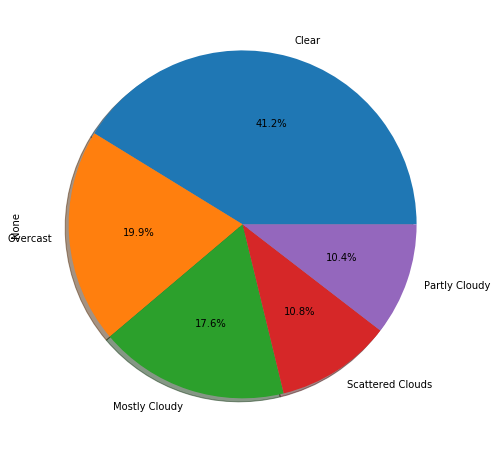

In [36]:
plt.figure(figsize=(14,8))
ga_only.groupby('Weather_Condition') \
        .size() \
        .sort_values(ascending = False) \
        .iloc[:5] \
        .plot.pie(explode=[0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()
plt.savefig('GA_weather.png')

In [20]:
#Top Weather Conditions for GA
clear = ga_only[(ga_only['Weather_Condition']=='Clear')]
overcast = ga_only[(ga_only['Weather_Condition']=='Overcast')]
mostly_cloud = ga_only[(ga_only['Weather_Condition']=='Mostly Cloudy')]
scatter_cloud = ga_only[(ga_only['Weather_Condition']=='Scattered Clouds')]
part_cloud= ga_only[(ga_only['Weather_Condition']=='Partly Cloudy')]
rain = ga_only[(ga_only['Weather_Condition']=='Light Rain')]

clear_avg = np.average(clear['Severity'])
overcast_avg = np.average(overcast['Severity'])
most_cloud_avg = np.average(mostly_cloud['Severity'])
scatter_cloud_avg = np.average(scatter_cloud['Severity'])
part_cloud_avg = np.average(part_cloud['Severity'])
rain_avg = np.average(rain['Severity'])

In [40]:
ga_weather_values= [['clear',clear_avg],['overcast',overcast_avg], ['mostly_cloud',most_cloud_avg], ['scatter_cloud',scatter_cloud_avg], ['part_cloud',part_cloud_avg], ['rain',rain_avg]]
ga_weather= pd.DataFrame(ga_weather_values, columns = ["Weather_Type","GA_Severity"])
ga_weather

,Weather_Type,GA_Severity
0,clear,2.621857
1,overcast,2.660334
2,mostly_cloud,2.718459
3,scatter_cloud,2.716442
4,part_cloud,2.695173
5,rain,2.693098


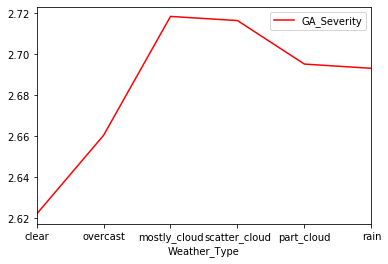

In [43]:
ga_weather.plot(kind='line',x="Weather_Type",y="GA_Severity",color="red")
#plt.show()
plt.savefig('Georgia Weather Severity Average')

In [33]:
#Top Weather Conditions for All States
clear = all_states[(all_states['Weather_Condition']=='Clear')]
overcast = all_states[(all_states['Weather_Condition']=='Overcast')]
mostly_cloud = all_states[(all_states['Weather_Condition']=='Mostly Cloudy')]
scatter_cloud = all_states[(all_states['Weather_Condition']=='Scattered Clouds')]
part_cloud= all_states[(all_states['Weather_Condition']=='Partly Cloudy')]
rain = all_states[(all_states['Weather_Condition']=='Light Rain')]


all_clear_avg = np.average(clear['Severity'])
all_overcast_avg = np.average(overcast['Severity'])
all_most_cloud_avg = np.average(mostly_cloud['Severity'])
all_scatter_cloud_avg = np.average(scatter_cloud['Severity'])
all_part_cloud_avg = np.average(part_cloud['Severity'])
all_rain_avg = np.average(rain['Severity'])
weather_values= [['clear',all_clear_avg],['overcast',all_overcast_avg], ['mostly_cloud',all_most_cloud_avg], ['scatter_cloud',all_scatter_cloud_avg], ['part_cloud',all_part_cloud_avg], ['rain',all_rain_avg]]
all_weather= pd.DataFrame(weather_values, columns = ["Weather_Type","Severity"])
all_weather

,Weather_Type,Severity
0,clear,2.368016
1,overcast,2.385506
2,mostly_cloud,2.380149
3,scatter_cloud,2.380393
4,part_cloud,2.366946
5,rain,2.404613


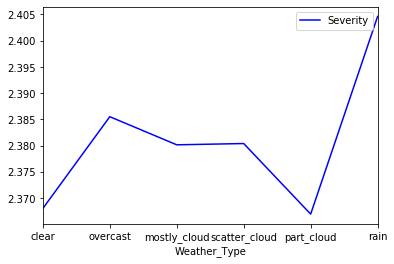

In [44]:
all_weather.plot(kind='line',x="Weather_Type",y="Severity",color="blue")
#plt.show()
plt.savefig('All States Weather Severity Average')

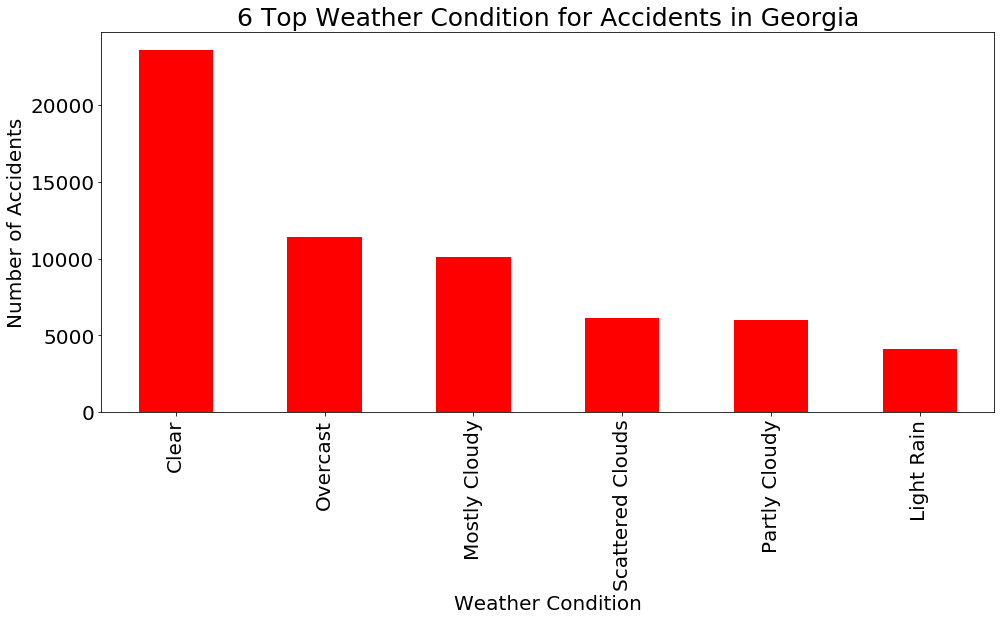

In [49]:
fig, ax=plt.subplots(figsize=(16,7))
ga_only['Weather_Condition'].value_counts().sort_values(ascending=False).head(6).plot.bar(width=0.5,color='red',align='center',linewidth=2)
plt.xlabel('Weather Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('6 Top Weather Condition for Accidents in Georgia',fontsize=25)
plt.ioff()
plt.savefig('Accident Frequency in GA')

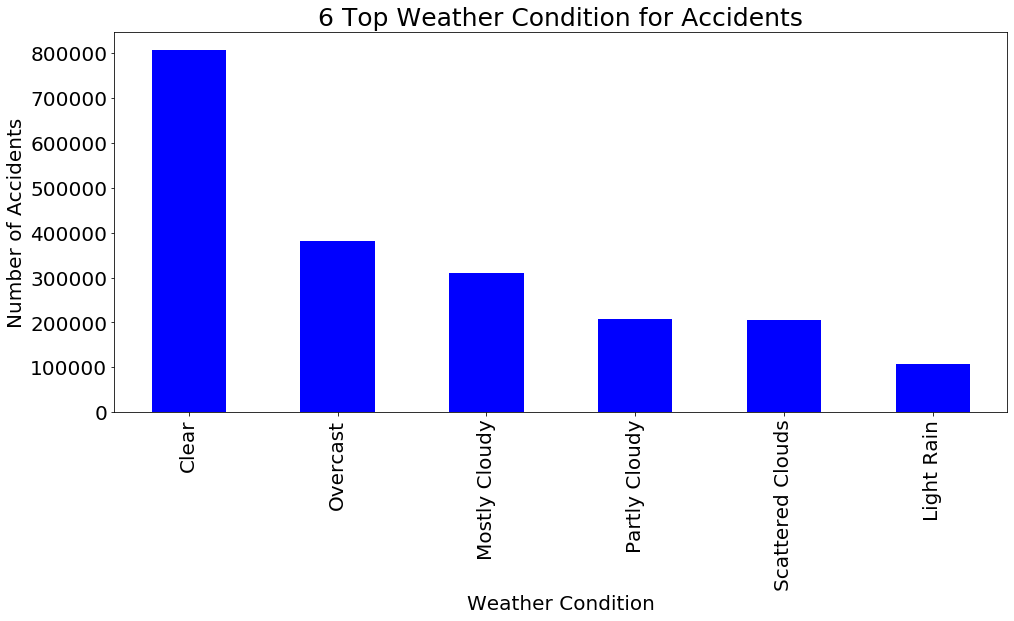

In [50]:
fig, ax=plt.subplots(figsize=(16,7))
all_states['Weather_Condition'].value_counts().sort_values(ascending=False).head(6).plot.bar(width=0.5,color='blue',align='center',linewidth=2)
plt.xlabel('Weather Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('6 Top Weather Condition for Accidents',fontsize=25)
plt.ioff()
plt.savefig('Accident Frequency in US')

In [ ]:
severity_comp = ga_severity.plot(kind='bar')

# Set the xlabel and ylabel
severity_comp.set_xlabel("Severity")
severity_comp.set_ylabel("Weather Condition")


plt.show()
plt.tight_layout()